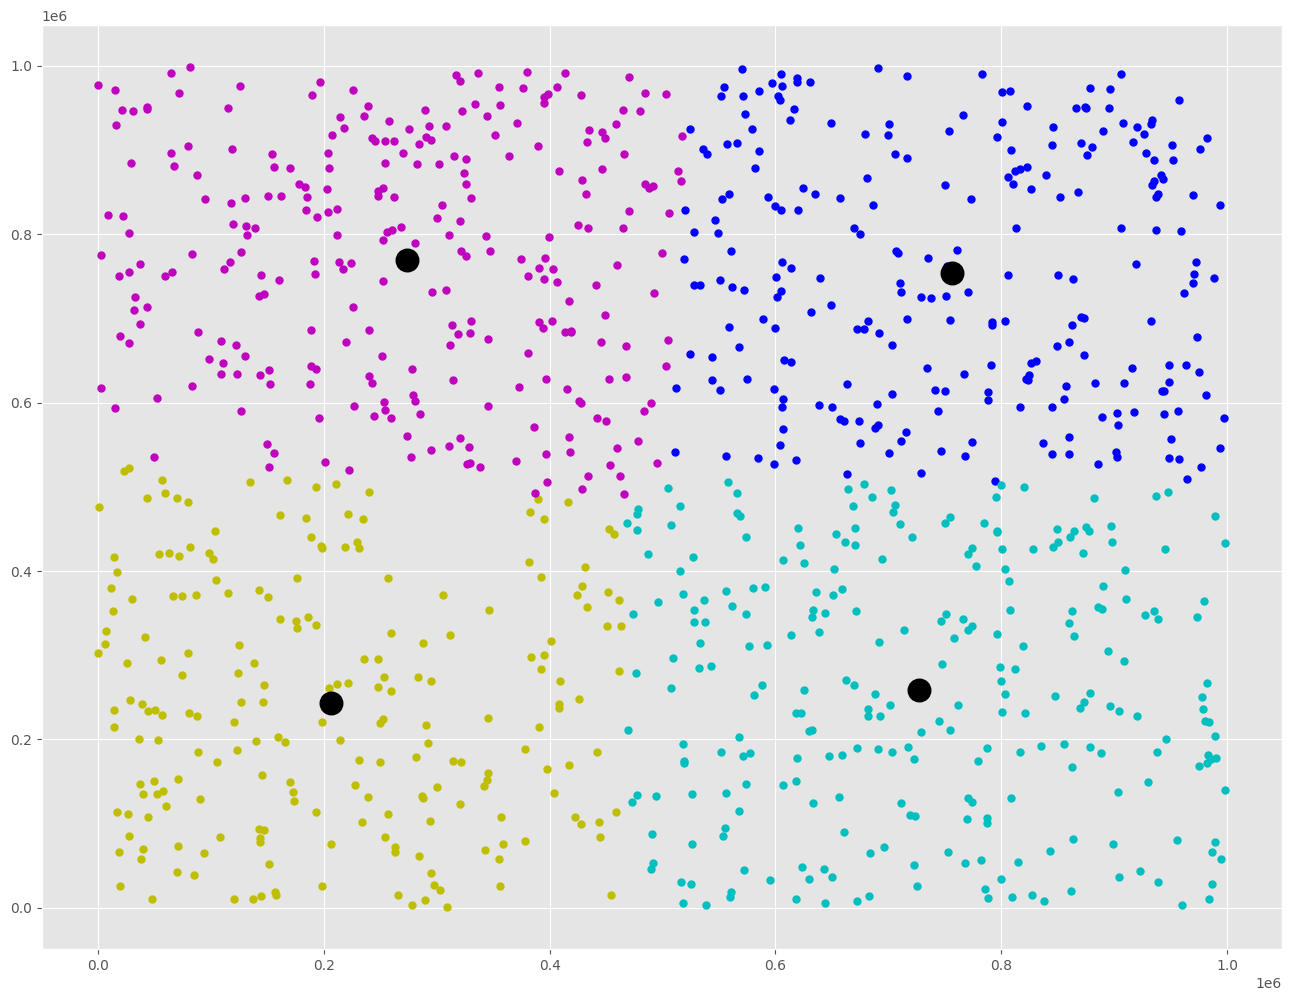

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(16, 12))

class KMeans:
    def __init__(self, k=2, max_iters=1000):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.labels = None

    def fit(self, data):
        self.centroids = data[np.random.choice(data.shape[0], self.k, replace=False)]
        for _ in range(self.max_iters):
            self.labels = self._assign_labels(data)
            new_centroids = self._update_centroids(data)
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids

    def _assign_labels(self, data):
        distances = np.sqrt(((data - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

    def _update_centroids(self, data):
        new_centroids = np.array([data[self.labels == k].mean(axis=0) for k in range(self.k)])
        return new_centroids

    def predict(self, data):
        distances = np.sqrt(((data - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

np.random.seed(1)
num_samples = 1000
data = np.random.rand(1000, 2) * 1000000


k = 4

kmeans = KMeans(k)
kmeans.fit(data)

centroids = kmeans.centroids
labels = kmeans.labels

colors = ['c.', 'y.', 'm.', 'b.']
for i in range(len(data)):
    plt.plot(data[i][0], data[i][1], colors[labels[i]], markersize=10)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=150, linewidths=5, zorder=10, color="black")
# plt.gca().set_aspect('equal')
plt.show()


In [ ]:
centroids

array([[172.33333333,  61.33333333],
       [181.25      ,  81.5       ]])